In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/PCOS Preprocessed.csv')

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['PCOS (Y/N)'],axis=1)
y = df['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=123)

In [ ]:
synthetic_df = pd.read_csv('/content/sample_data/PCOS_synthetic_external.csv')
X_test_syn = synthetic_df.drop('PCOS (Y/N)',axis=1)
y_test_syn = synthetic_df['PCOS (Y/N)']

In [ ]:
# Convert data to numpy arrays and ensure proper shape
X_train_np = X_train.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

In [ ]:
X_test_syn_np = X_test_syn.values.astype(np.float32)
y_test_syn_np = y_test_syn.values.astype(np.float32)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
# Define Bayesian Neural Network using MC Dropout
def build_mc_dropout_model(input_dim):
    model = keras.Sequential([
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),  # Dropout for Bayesian Approximation
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize model
input_dim = X_train.shape[1]
bnn_model = build_mc_dropout_model(input_dim)

# Train model
bnn_model.fit(X_train_np, y_train_np, epochs=500, batch_size=32, verbose=1)

# Number of MC samples
num_samples = 1000

# Perform MC Dropout (make multiple predictions)
y_pred_samples = np.array([bnn_model(X_test_np, training=True).numpy().flatten() for _ in range(num_samples)])

# Calculate mean and standard deviation (uncertainty) of predictions
y_pred_mean = y_pred_samples.mean(axis=0)  # Mean prediction for each sample
y_pred_std = y_pred_samples.std(axis=0)   # Standard deviation as uncertainty

# Convert to binary predictions (PCOS or not) by thresholding at 0.5
y_pred_binary = (y_pred_mean > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test_np, y_pred_binary))

# Example: Display the uncertainty (std) for the first 5 samples
print("\nUncertainty (Standard Deviation) for First 5 Samples:")
print(y_pred_std[:5])  # Print uncertainty for the first 5 test samples


Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6080 - loss: 0.6417
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.3725  
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.2610 
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9216 - loss: 0.2108 
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.1975 
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - loss: 0.1963 
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9389 - loss: 0.1771 
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9129 - loss: 0.1983 
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 0.1853 
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9159 - loss: 0.1985 
Epoch 11/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9340 - loss: 0.1785 
Epoch 12/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Run again

In [ ]:


# Train model
bnn_model.fit(X_train_np, y_train_np, epochs=500, batch_size=32, verbose=1)

# Number of MC samples
num_samples = 1000

# Perform MC Dropout (make multiple predictions)
y_pred_samples = np.array([bnn_model(X_test_np, training=True).numpy().flatten() for _ in range(num_samples)])

# Calculate mean and standard deviation (uncertainty) of predictions
y_pred_mean = y_pred_samples.mean(axis=0)  # Mean prediction for each sample
y_pred_std = y_pred_samples.std(axis=0)   # Standard deviation as uncertainty

# Convert to binary predictions (PCOS or not) by thresholding at 0.5
y_pred_binary = (y_pred_mean > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test_np, y_pred_binary))

# Example: Display the uncertainty (std) for the first 5 samples
print("\nUncertainty (Standard Deviation) for First 5 Samples:")
print(y_pred_std[:5])  # Print uncertainty for the first 5 test samples


Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0651 
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.0762 
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0758
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.0801 
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.0805 
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.0705 
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0573 
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0700 
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0758 
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0828 
Epoch 11/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.0814 
Epoch 12/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [ ]:
# Synthetic external
# Perform MC Dropout (make multiple predictions)
y_pred_samples = np.array([bnn_model(X_test_syn_np, training=True).numpy().flatten() for _ in range(num_samples)])

# Calculate mean and standard deviation (uncertainty) of predictions
y_pred_mean = y_pred_samples.mean(axis=0)  # Mean prediction for each sample
y_pred_std = y_pred_samples.std(axis=0)   # Standard deviation as uncertainty

# Convert to binary predictions (PCOS or not) by thresholding at 0.5
y_pred_binary = (y_pred_mean > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test_syn_np, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       126
         1.0       0.82      0.79      0.81       124

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_np, y_pred_binary))

0.9383561643835616


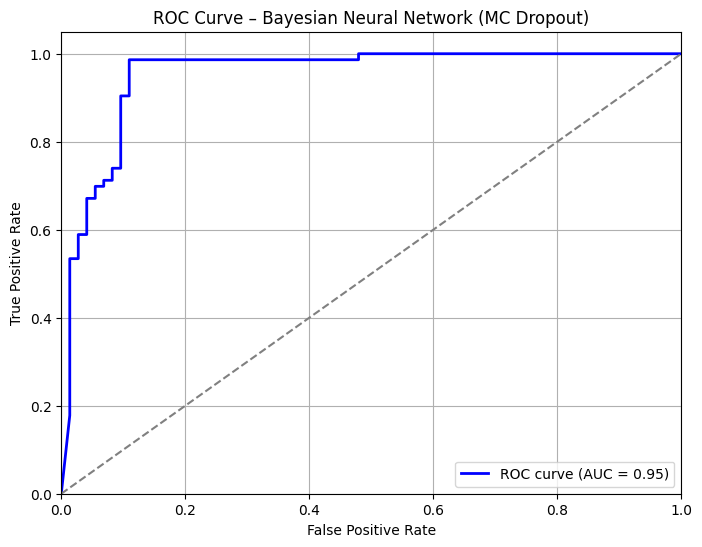

ROC-AUC Score: 0.9530


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use the mean predictions from MC samples for ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_mean)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Bayesian Neural Network (MC Dropout)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")


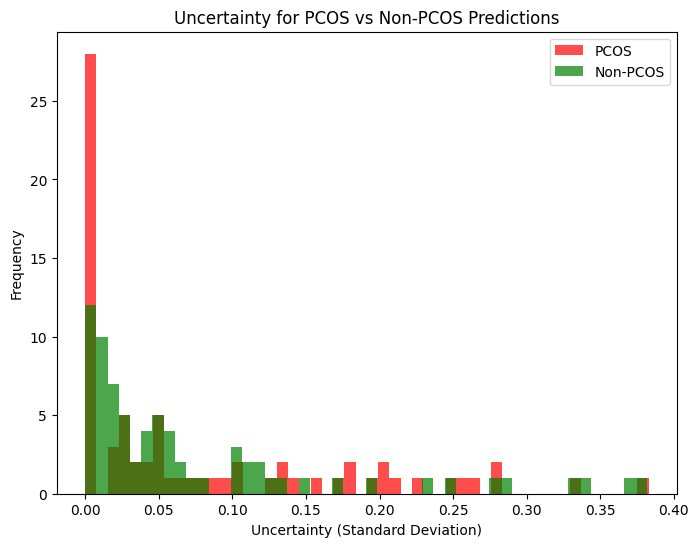

In [ ]:
# Plot predictions (mean) vs uncertainty (std)
import matplotlib.pyplot as plt
# Plot uncertainty for PCOS (1) vs Non-PCOS (0) predictions
pcos_uncertainty = y_pred_std[y_test_np == 1]  # Uncertainty for PCOS cases
non_pcos_uncertainty = y_pred_std[y_test_np == 0]  # Uncertainty for Non-PCOS cases

plt.figure(figsize=(8, 6))
plt.hist(pcos_uncertainty, bins=50, alpha=0.7, color='red', label='PCOS')
plt.hist(non_pcos_uncertainty, bins=50, alpha=0.7, color='green', label='Non-PCOS')

plt.title('Uncertainty for PCOS vs Non-PCOS Predictions')
plt.xlabel('Uncertainty (Standard Deviation)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
